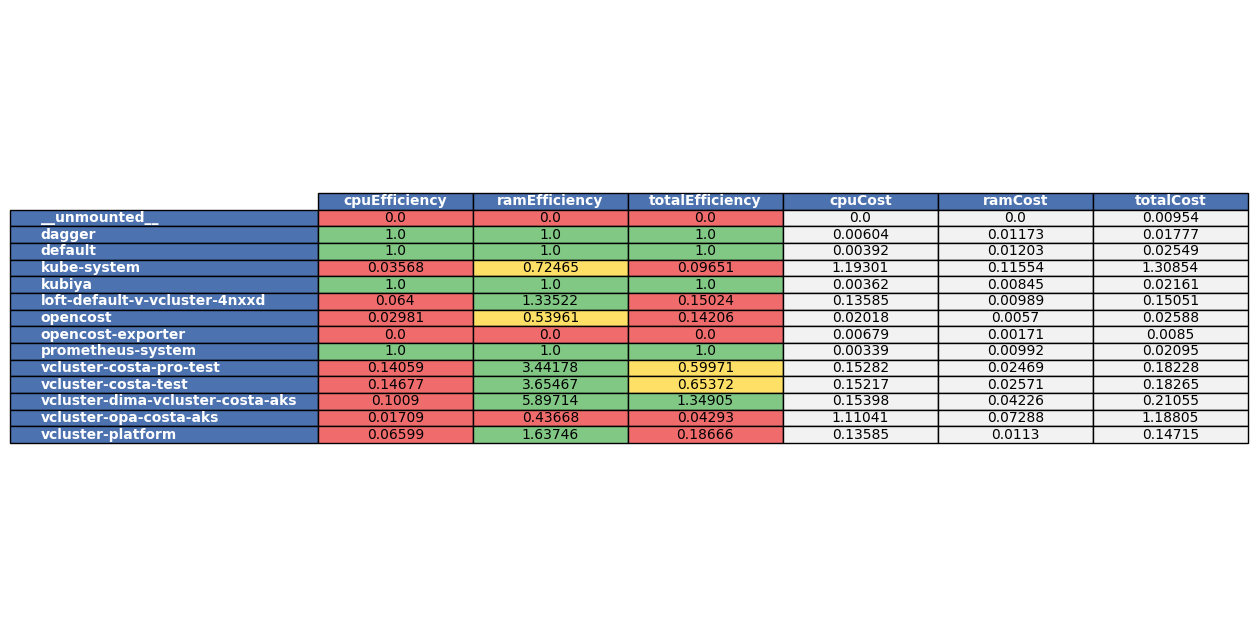

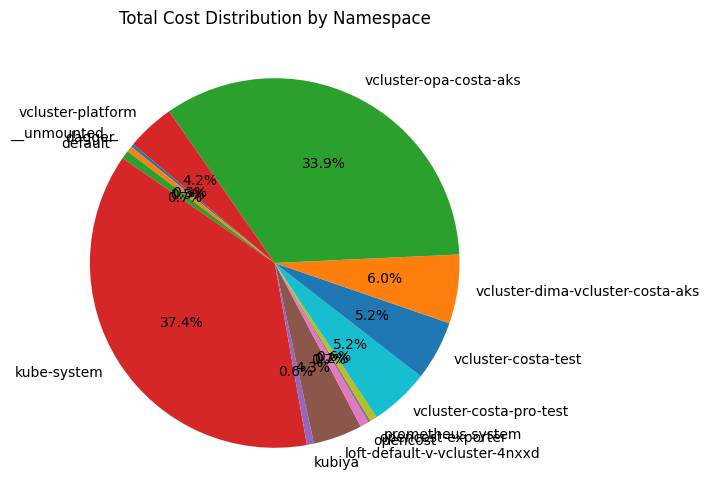

In [3]:

import matplotlib.pyplot as plt
import pandas as pd

data = {'__unmounted__': {'cpuEfficiency': 0, 'ramEfficiency': 0, 'totalEfficiency': 0, 'cpuCost': 0, 'ramCost': 0, 'totalCost': 0.00954}, 'dagger': {'cpuEfficiency': 1, 'ramEfficiency': 1, 'totalEfficiency': 1, 'cpuCost': 0.00604, 'ramCost': 0.01173, 'totalCost': 0.01777}, 'default': {'cpuEfficiency': 1, 'ramEfficiency': 1, 'totalEfficiency': 1, 'cpuCost': 0.00392, 'ramCost': 0.01203, 'totalCost': 0.02549}, 'kube-system': {'cpuEfficiency': 0.03568, 'ramEfficiency': 0.72465, 'totalEfficiency': 0.09651, 'cpuCost': 1.19301, 'ramCost': 0.11554, 'totalCost': 1.30854}, 'kubiya': {'cpuEfficiency': 1, 'ramEfficiency': 1, 'totalEfficiency': 1, 'cpuCost': 0.00362, 'ramCost': 0.00845, 'totalCost': 0.02161}, 'loft-default-v-vcluster-4nxxd': {'cpuEfficiency': 0.064, 'ramEfficiency': 1.33522, 'totalEfficiency': 0.15024, 'cpuCost': 0.13585, 'ramCost': 0.00989, 'totalCost': 0.15051}, 'opencost': {'cpuEfficiency': 0.02981, 'ramEfficiency': 0.53961, 'totalEfficiency': 0.14206, 'cpuCost': 0.02018, 'ramCost': 0.0057, 'totalCost': 0.02588}, 'opencost-exporter': {'cpuEfficiency': 0, 'ramEfficiency': 0, 'totalEfficiency': 0, 'cpuCost': 0.00679, 'ramCost': 0.00171, 'totalCost': 0.0085}, 'prometheus-system': {'cpuEfficiency': 1, 'ramEfficiency': 1, 'totalEfficiency': 1, 'cpuCost': 0.00339, 'ramCost': 0.00992, 'totalCost': 0.02095}, 'vcluster-costa-pro-test': {'cpuEfficiency': 0.14059, 'ramEfficiency': 3.44178, 'totalEfficiency': 0.59971, 'cpuCost': 0.15282, 'ramCost': 0.02469, 'totalCost': 0.18228}, 'vcluster-costa-test': {'cpuEfficiency': 0.14677, 'ramEfficiency': 3.65467, 'totalEfficiency': 0.65372, 'cpuCost': 0.15217, 'ramCost': 0.02571, 'totalCost': 0.18265}, 'vcluster-dima-vcluster-costa-aks': {'cpuEfficiency': 0.1009, 'ramEfficiency': 5.89714, 'totalEfficiency': 1.34905, 'cpuCost': 0.15398, 'ramCost': 0.04226, 'totalCost': 0.21055}, 'vcluster-opa-costa-aks': {'cpuEfficiency': 0.01709, 'ramEfficiency': 0.43668, 'totalEfficiency': 0.04293, 'cpuCost': 1.11041, 'ramCost': 0.07288, 'totalCost': 1.18805}, 'vcluster-platform': {'cpuEfficiency': 0.06599, 'ramEfficiency': 1.63746, 'totalEfficiency': 0.18666, 'cpuCost': 0.13585, 'ramCost': 0.0113, 'totalCost': 0.14715}}

# Convert data to DataFrame
df = pd.DataFrame(data).T

# Styling the DataFrame for a richer table display
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Using cell colors based on conditions for visual enhancement
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 rowLabels=df.index,
                 cellLoc='center',
                 loc='center')

# Format the table with richer styling
for (i, j), cell in table.get_celld().items():
    # Header row and index column
    if i == 0 or j == -1:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor("#4c72b0")
    else:
        # Highlight efficiency values based on thresholds
        if df.columns[j] in ["cpuEfficiency", "ramEfficiency", "totalEfficiency"]:
            efficiency = df.iloc[i - 1, j]  # Adjust for zero-based index
            if efficiency >= 1:
                cell.set_facecolor("#82c885")  # Green for high efficiency
            elif 0.5 <= efficiency < 1:
                cell.set_facecolor("#ffe066")  # Yellow for moderate efficiency
            else:
                cell.set_facecolor("#f06c6c")  # Red for low efficiency
        else:
            cell.set_facecolor("#f2f2f2")  # Neutral background for other metrics


# Extract namespaces and totalCost values from the provided data
namespaces = list(data.keys())
total_costs = [entry['totalCost'] for entry in data.values()]

# Plotting a smaller pie chart for total cost distribution by namespace
plt.figure(figsize=(6, 6))
plt.pie(total_costs, labels=namespaces, autopct='%1.1f%%', startangle=140)
plt.title('Total Cost Distribution by Namespace')

# Show the styled table
plt.show()




In [4]:
# Function to plot a pretty table
def plot_pretty_table(df):
    fig, ax = plt.subplots(figsize=(len(df.columns), len(df) * 0.5))
    ax.axis("tight")
    ax.axis("off")

    # Create table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    
    # Styling
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    # Optional: Customize cell colors
    for i in range(len(df)):
        for j in range(len(df.columns)):
            if i % 2 == 0:
                table[(i + 1, j)].set_facecolor("#f0f0f0")  # Light gray for alternate rows

    plt.show()
    

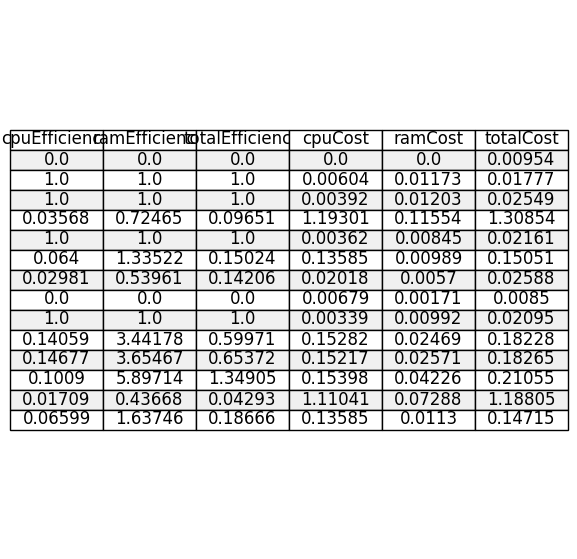

In [5]:
plot_pretty_table(df)

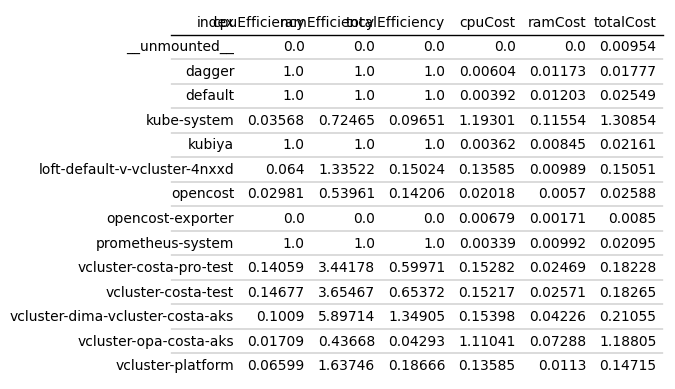

In [7]:
from plottable import Table


tab = Table(df)

plt.show()


In [8]:
df.head()

,cpuEfficiency,ramEfficiency,totalEfficiency,cpuCost,ramCost,totalCost
index,,,,,,
__unmounted__,0.00000,0.00000,0.00000,0.00000,0.00000,0.00954
dagger,1.00000,1.00000,1.00000,0.00604,0.01173,0.01777
default,1.00000,1.00000,1.00000,0.00392,0.01203,0.02549
kube-system,0.03568,0.72465,0.09651,1.19301,0.11554,1.30854
kubiya,1.00000,1.00000,1.00000,0.00362,0.00845,0.02161
